In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
## Google Colab related codes
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
DataDir = pathlib.Path('/content/drive/My Drive/Colab Notebooks/preg_imgs')
PositiveImages = list(DataDir.glob('processed_positive_images/*'))
NegativeImages = list(DataDir.glob('processed_negative_images/*'))

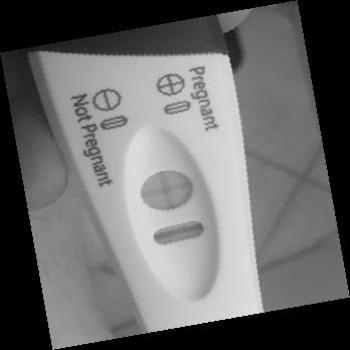

In [4]:
PIL.Image.open(str(PositiveImages[15]))

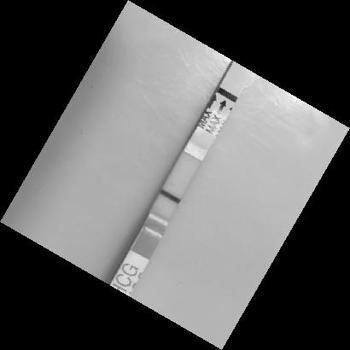

In [5]:
PIL.Image.open(str(NegativeImages[15]))


In [6]:
batch_size=32
train = tf.keras.preprocessing.image_dataset_from_directory(
    DataDir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    batch_size=batch_size
)

Found 9747 files belonging to 2 classes.
Using 7798 files for training.


In [7]:
val = tf.keras.preprocessing.image_dataset_from_directory(
    DataDir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    batch_size=32
)

Found 9747 files belonging to 2 classes.
Using 1949 files for validation.


In [8]:
ClassNames = train.class_names
print(ClassNames)

['processed_negative_images', 'processed_positive_images']


In [9]:
## Training the model

ResNet = Sequential()

pretrained_ResNet = tf.keras.applications.ResNet50(include_top=False,
                                                   input_shape=(256,256,3),
                                                   pooling='max',
                                                   classes=2,
                                                   weights='imagenet')
for layer in pretrained_ResNet.layers:
  layer.trainable=False

ResNet.add(pretrained_ResNet)
ResNet.add(Flatten())
ResNet.add(Dense(256,activation='relu'))
ResNet.add(Dense(2, activation='softmax'))


94765736/94765736 [==============================] - 5s 0us/step


In [10]:
ResNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 256)               524544    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 514       
 apper)                                                          
                                                                 
Total params: 24112770 (91.98 MB)
Trainable params: 525058 (2.00 MB)
Non-trainable params: 23587712 (89.98 MB)
___________

In [11]:
ResNet.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
epochs=10
history = ResNet.fit(
    train,
    validation_data=val,
    epochs=epochs
)

Epoch 1/10
244/244 [==============================] - 745s 2s/step - loss: 1.2565 - accuracy: 0.6797 - val_loss: 0.4609 - val_accuracy: 0.7835
Epoch 2/10
244/244 [==============================] - 13s 54ms/step - loss: 0.4480 - accuracy: 0.7932 - val_loss: 0.4122 - val_accuracy: 0.8081
Epoch 3/10
244/244 [==============================] - 14s 54ms/step - loss: 0.3860 - accuracy: 0.8305 - val_loss: 0.5168 - val_accuracy: 0.7624
Epoch 4/10
244/244 [==============================] - 14s 54ms/step - loss: 0.3514 - accuracy: 0.8434 - val_loss: 0.4299 - val_accuracy: 0.8066
Epoch 5/10
244/244 [==============================] - 13s 54ms/step - loss: 0.3243 - accuracy: 0.8598 - val_loss: 0.3715 - val_accuracy: 0.8394
Epoch 6/10
244/244 [==============================] - 14s 55ms/step - loss: 0.2871 - accuracy: 0.8782 - val_loss: 0.4186 - val_accuracy: 0.8230
Epoch 7/10
244/244 [==============================] - 14s 54ms/step - loss: 0.2592 - accuracy: 0.8941 - val_loss: 0.3636 - val_accuracy: 

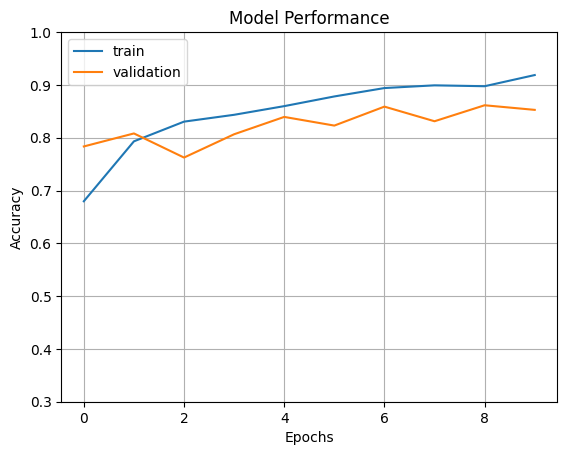

In [13]:
fig = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.3,ymax=1)
plt.grid()
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])


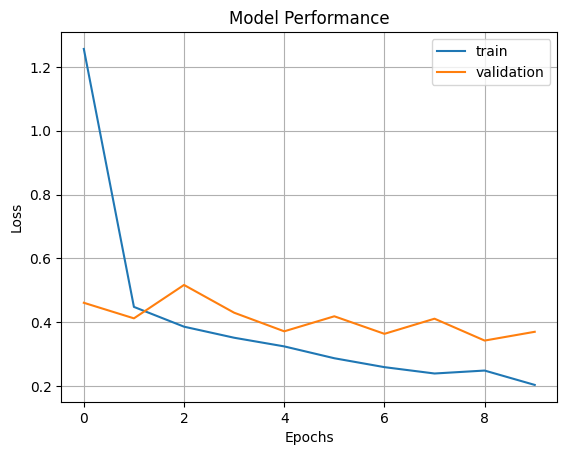

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Performance')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [16]:
ResNet.save('ClearPreg_weights')